In [3]:
import matplotlib.pyplot as plt
import numpy as np
from goes2go import GOES
import cartopy.feature as cfeature
import cartopy.crs as ccrs

import sys
sys.path.append('/home/cdalden/goes_work/processing/')

from utils import calculate_degrees 

In [16]:
G = GOES(satellite=18, product="ABI-L2-ACMC", domain='C')
ds = G.nearesttime('2025-06-01 16:00:00')



 👮🏻‍♂️ File already exists. Do not overwrite: /home/cdalden/data/noaa-goes18/ABI-L2-ACMC/2025/152/16/OR_ABI-L2-ACMC-M6_G18_s20251521601184_e20251521603557_c20251521605187.nc
📦 Finished downloading [1] files to [/home/cdalden/data/noaa-goes18/ABI-L2-ACMC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [17]:
latitude, longitude = calculate_degrees(ds)
ds = ds.assign_coords(y=("y", latitude[:,0]), x=("x", longitude[0,:]))
ds = ds.rename({'y':'latitude', 'x':'longitude'})
ds

<xarray.Dataset> Size: 60MB
Dimensions:                                                     (
                                                                 latitude: 1500,
                                                                 longitude: 2500,
                                                                 number_of_time_bounds: 2,
                                                                 number_of_image_bounds: 2,
                                                                 RTM_BT_comparison_bands: 2,
                                                                 number_of_focal_planes_used: 2,
                                                                 number_of_LZA_bounds: 2,
                                                                 number_of_SZA_bounds: 2)
Coordinates: (12/14)
  * latitude                                                    (latitude) float64 12kB ...
  * longitude                                                   (longitude) float64 20kB ...
    t                                                           datetime64[ns] 8B ...
    y_image                                                     float32 4B 0....
    x_image                                                     float32 4B 0.0
    retrieval_local_zenith_angle                                float32 4B 90.0
    ...                                                          ...
    RTM_BT_comparison_wavelengths                               (RTM_BT_comparison_bands) float32 8B ...
    RTM_BT_comparison_band_ids                                  (RTM_BT_comparison_bands) int8 2B ...
    dataset_name                                                <U72 288B 'OR...
    date_created                                                <U22 88B '202...
    time_coverage_start                                         <U22 88B '202...
    time_coverage_end                                           <U22 88B '202...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                RTM_BT_comparison_bands,
                                number_of_focal_planes_used,
                                number_of_LZA_bounds, number_of_SZA_bounds
Data variables: (12/42)
    BCM                                                         (latitude, longitude) float32 15MB ...
    ACM                                                         (latitude, longitude) float32 15MB ...
    Cloud_Probabilities                                         (latitude, longitude) float32 15MB ...
    DQF                                                         (latitude, longitude) float32 15MB ...
    time_bounds                                                 (number_of_time_bounds) datetime64[ns] 16B ...
    goes_imager_projection                                      int32 4B -214...
    ...                                                          ...
    twilight_solar_zenith_angle                                 float32 4B 90.0
    retrieval_solar_zenith_angle_bounds                         (number_of_SZA_bounds) float32 8B ...
    twilight_solar_zenith_angle_bounds                          (number_of_SZA_bounds) float32 8B ...
    percent_uncorrectable_GRB_errors                            float32 4B 0.0
    percent_uncorrectable_L0_errors                             float32 4B 0.0
    filename                                                    <U108 432B 'n...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    processing_level:          National Aeronautics and Space Administration ...
    cdm_data_type:             Image
    timeline_id:               ABI Mode 6
    productio

In [18]:
ds_sub = ds.sel(latitude=slice(41,37), longitude=slice(-109, -104))
ds_sub

<xarray.Dataset> Size: 285kB
Dimensions:                                                     (latitude: 143,
                                                                 longitude: 123,
                                                                 number_of_time_bounds: 2,
                                                                 number_of_image_bounds: 2,
                                                                 RTM_BT_comparison_bands: 2,
                                                                 number_of_focal_planes_used: 2,
                                                                 number_of_LZA_bounds: 2,
                                                                 number_of_SZA_bounds: 2)
Coordinates: (12/14)
  * latitude                                                    (latitude) float64 1kB ...
  * longitude                                                   (longitude) float64 984B ...
    t                                                           datetime64[ns] 8B ...
    y_image                                                     float32 4B 0....
    x_image                                                     float32 4B 0.0
    retrieval_local_zenith_angle                                float32 4B 90.0
    ...                                                          ...
    RTM_BT_comparison_wavelengths                               (RTM_BT_comparison_bands) float32 8B ...
    RTM_BT_comparison_band_ids                                  (RTM_BT_comparison_bands) int8 2B ...
    dataset_name                                                <U72 288B 'OR...
    date_created                                                <U22 88B '202...
    time_coverage_start                                         <U22 88B '202...
    time_coverage_end                                           <U22 88B '202...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                RTM_BT_comparison_bands,
                                number_of_focal_planes_used,
                                number_of_LZA_bounds, number_of_SZA_bounds
Data variables: (12/42)
    BCM                                                         (latitude, longitude) float32 70kB ...
    ACM                                                         (latitude, longitude) float32 70kB ...
    Cloud_Probabilities                                         (latitude, longitude) float32 70kB ...
    DQF                                                         (latitude, longitude) float32 70kB ...
    time_bounds                                                 (number_of_time_bounds) datetime64[ns] 16B ...
    goes_imager_projection                                      int32 4B -214...
    ...                                                          ...
    twilight_solar_zenith_angle                                 float32 4B 90.0
    retrieval_solar_zenith_angle_bounds                         (number_of_SZA_bounds) float32 8B ...
    twilight_solar_zenith_angle_bounds                          (number_of_SZA_bounds) float32 8B ...
    percent_uncorrectable_GRB_errors                            float32 4B 0.0
    percent_uncorrectable_L0_errors                             float32 4B 0.0
    filename                                                    <U108 432B 'n...
Attributes: (12/26)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    processing_level:          National Aeronautics and Space Administration ...
    cdm_data_type:             Image
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        3b1fea67-8

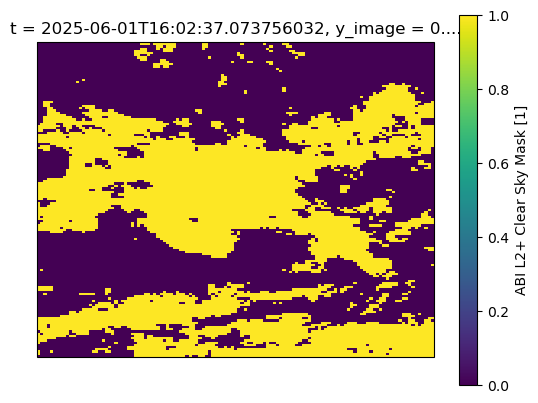

In [21]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ds_sub['BCM'].plot.imshow(x='longitude', y='latitude', ax=ax)
ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')